In [1]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import folium
from datasets_tourism import *

> 2024-06-11 15:52:59,043 [info] Project loaded successfully: {'project_name': 'overtourism'}


# Timeframe giugno - settembre 2023 

In [3]:
START_DATE = "2023-06-01"
END_DATE = "2023-09-30 23:00"
SPECIFIC_DAY = "2023-06-29"

# Parcheggi 

In [111]:
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
0,1.0,3.0,3.0,9.0,6.0,4.0,12.0,8.0,7.0,13.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,99.0,2022-07-27
1,1.0,4.0,5.0,4.0,10.0,14.0,35.0,23.0,22.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,156.0,2022-07-28
2,1.0,2.0,8.0,7.0,10.0,16.0,38.0,21.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,2022-07-29
3,5.0,15.0,21.0,23.0,35.0,22.0,107.0,83.0,85.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,2022-07-30
4,8.0,11.0,24.0,39.0,45.0,34.0,123.0,121.0,141.0,140.0,...,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1056.0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


### Visualize data within the specific timeframe

In [74]:
statistiche_parcheggi_molveno_timeframe_df = statistiche_parcheggi_molveno_df[
    (statistiche_parcheggi_molveno_df["date"] >= START_DATE) & 
    (statistiche_parcheggi_molveno_df["date"] <= END_DATE)
]

<AxesSubplot: xlabel='date'>

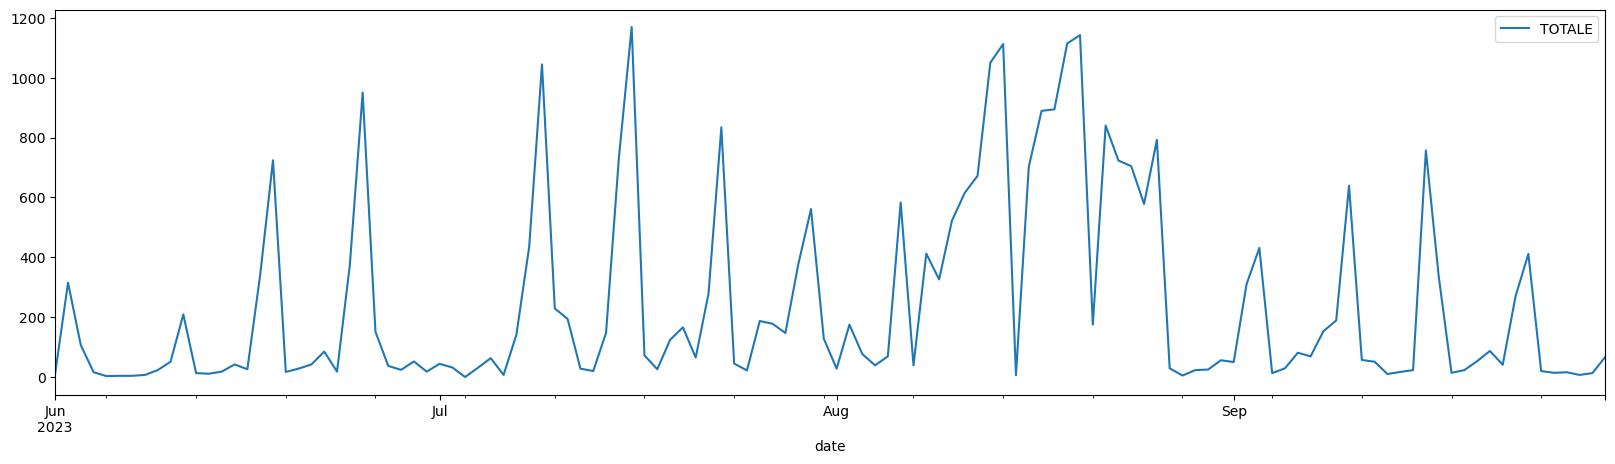

In [75]:
statistiche_parcheggi_molveno_timeframe_df.plot(y=["TOTALE"], x="date", figsize=(20,5))

# Dati Vodafone

## Vodafone Aree

In [103]:
vodafone_aree_df

,locId,locName,locType,locDescr
0,22,provincia,AL_2,Trentino
1,100,apt,TN_MKT_AM_22,"San Martino Di Castrozza, Primiero e Vanoi"
2,101,apt,TN_MKT_AM_22,Valle di Non
3,102,apt,TN_MKT_AM_22,"Rovereto, Vallagarina e Monte Baldo"
4,103,apt,TN_MKT_AM_22,Valle di Fassa
...,...,...,...,...
148,LAGO_CAPR,poi,TN_MKT_POI,Lago dei Caprioli
149,MADO_CAMP,poi,TN_MKT_POI,Madonna di Campiglio
150,PINZ_REND,poi,TN_MKT_POI,Pinzolo e Rendena
151,STAZ_ROVE,poi,TN_MKT_POI,Stazione di Trento


<AxesSubplot: xlabel='locName'>

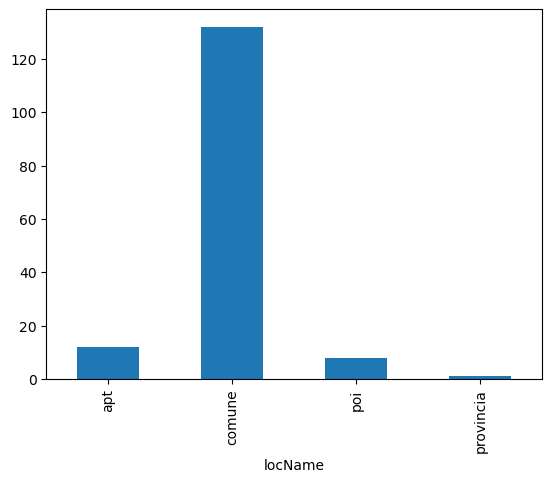

In [104]:
vodafone_aree_df.groupby("locName")["locId"].count().plot(kind="bar")

## Vodafone Attendances

In [105]:
attendances_timeframe_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    ()
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0
...,...,...,...,...,...,...,...
237572,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0
237573,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,90
237574,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0
237575,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,69


In [106]:
attendances_timeframe_df["date"] = pd.to_datetime(attendances_timeframe_df["date"])
attendances_timeframe_df["year"] = attendances_timeframe_df["date"].dt.year
attendances_timeframe_df["month"] = attendances_timeframe_df["date"].dt.month
attendances_timeframe_df["day"] = attendances_timeframe_df["date"].dt.day


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [107]:
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
237572,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0,2023,9,30
237573,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,90,2023,9,30
237574,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,9,30
237575,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,69,2023,9,30


In [108]:
attendances_timeframe_df.groupby(["date"])["value"].sum()

date
2023-06-01    231508
2023-06-02    227768
2023-06-03    261777
2023-06-04    247260
2023-06-05    231779
               ...  
2023-09-26    215672
2023-09-27    219892
2023-09-28    222399
2023-09-29    239090
2023-09-30    260724
Name: value, Length: 122, dtype: int64

In [109]:
test = attendances_timeframe_df.groupby(["date", "userProfile"])["value"].sum()
test

date        userProfile
2023-06-01  COMMUTER         1423
            TOURIST        149029
            VISITOR         81056
2023-06-02  COMMUTER          985
            TOURIST        151732
                            ...  
2023-09-29  TOURIST        161544
            VISITOR         75814
2023-09-30  COMMUTER         2063
            TOURIST        178811
            VISITOR         79850
Name: value, Length: 366, dtype: int64

<AxesSubplot: xlabel='date'>

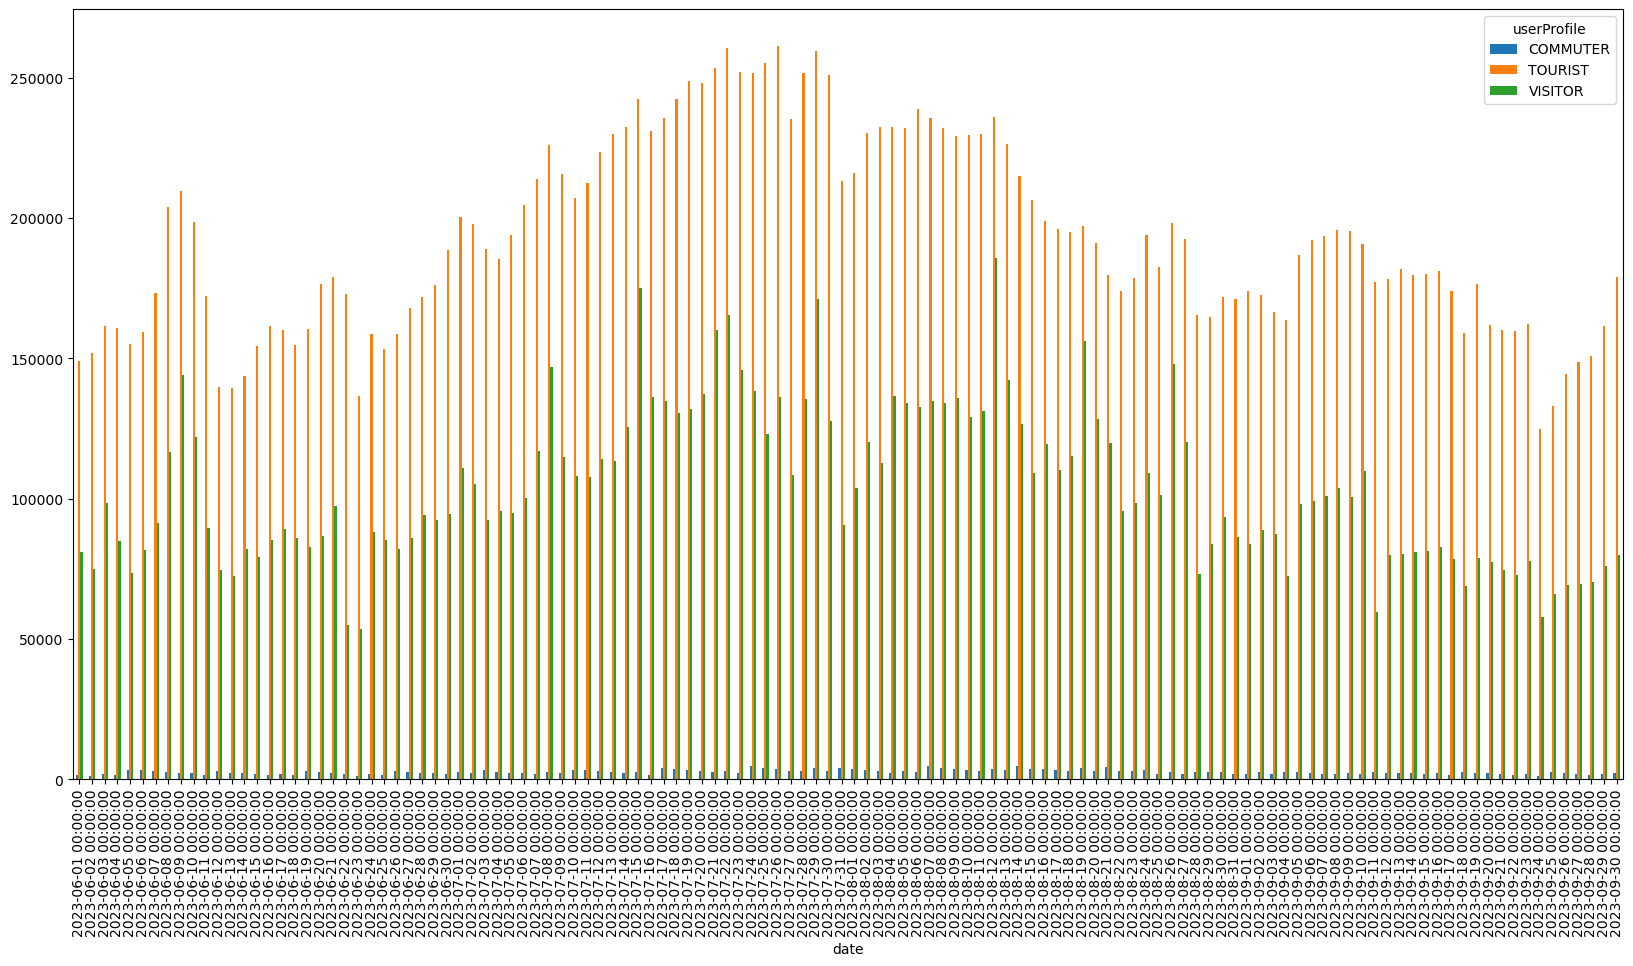

In [110]:
attendances_timeframe_df.groupby(["date", "userProfile"])["value"].sum().unstack().plot.bar(figsize=(20, 10))

## Vodafone Attendances stranieri

In [85]:
vodafone_attendences_STR_df["date"] = pd.to_datetime(vodafone_attendences_STR_df["date"])
vodafone_attendences_STR_df["year"] = vodafone_attendences_STR_df["date"].dt.year
vodafone_attendences_STR_df["month"] = vodafone_attendences_STR_df["date"].dt.month
vodafone_attendences_STR_df["day"] = vodafone_attendences_STR_df["date"].dt.day
vodafone_attendences_STR_df.dtypes

date           datetime64[ns]
locType                object
locId                  object
userCountry            object
userProfile            object
userCluster            object
value                   int64
year                    int32
month                   int32
day                     int32
dtype: object

In [102]:
attendances_str_timeframe_df = vodafone_attendences_STR_df[
    (vodafone_attendences_STR_df["date"] >= START_DATE) &
    (vodafone_attendences_STR_df["date"] <= END_DATE)
]
attendances_str_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0
...,...,...,...,...,...,...,...
237572,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0
237573,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,90
237574,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0
237575,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,69


In [87]:
attendances_str_timeframe_df[attendances_str_timeframe_df["date"] == "2023-06-01"]

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
190540,2023-06-01,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0,2023,6,1
190541,2023-06-01,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,214,2023,6,1
190542,2023-06-01,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,6,1
190543,2023-06-01,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,61,2023,6,1


<AxesSubplot: xlabel='date'>

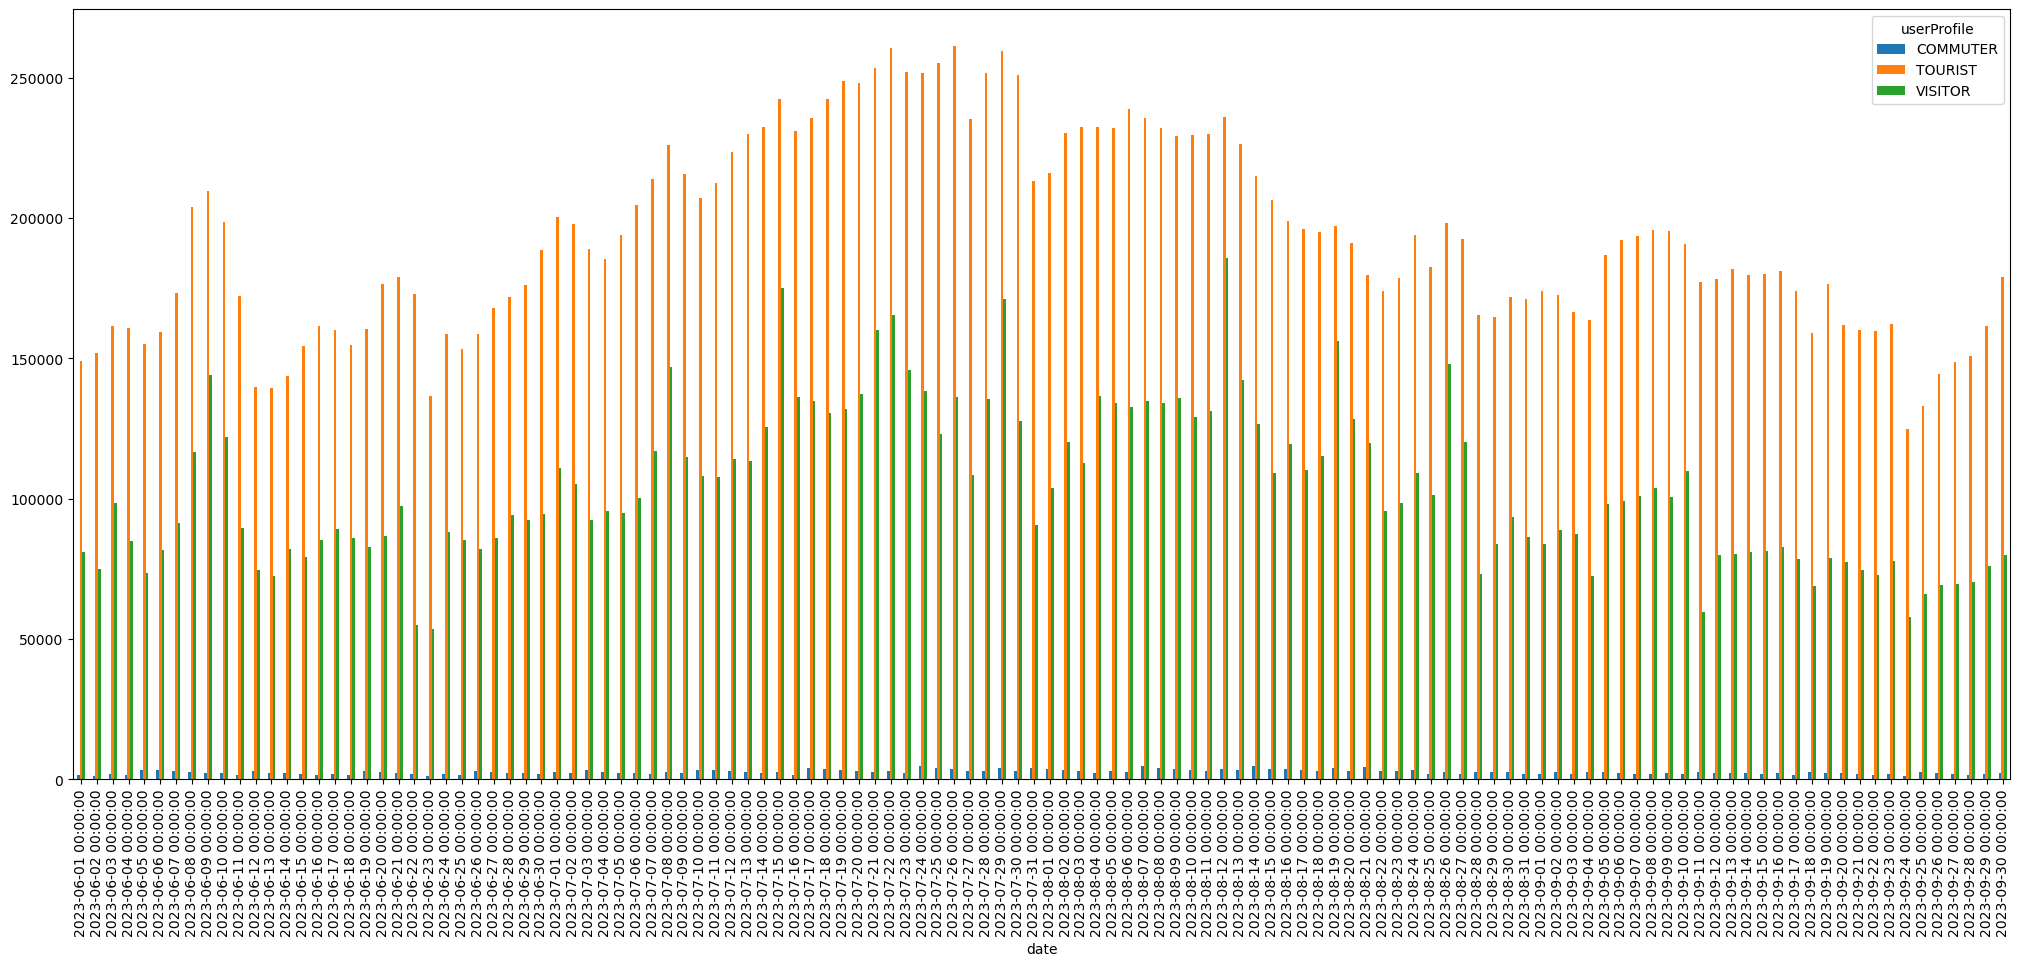

In [88]:
attendances_str_timeframe_df.groupby(["date", "userProfile"])["value"].sum().unstack().plot.bar(figsize=(25, 10))

# Contapersone passaggi

In [89]:
contapersone_passaggi_df.rename(columns={"data": "date"}, inplace=True)
contapersone_passaggi_df = contapersone_passaggi_df[
    (contapersone_passaggi_df["date"] >= START_DATE) & 
    (contapersone_passaggi_df["date"] <= END_DATE)
]
contapersone_passaggi_df

,date,varco,presenze
0,2023-07-14,Varco 1,393
1,2023-07-14,Varco 2,91
2,2023-07-14,Varco 3,160
3,2023-07-14,Varco 4,70
4,2023-07-14,Varco 5,82
...,...,...,...
499,2023-09-07,Varco 5,207
500,2023-09-07,Varco 6,90
501,2023-09-07,Varco 7,196
502,2023-09-07,Varco 8,95


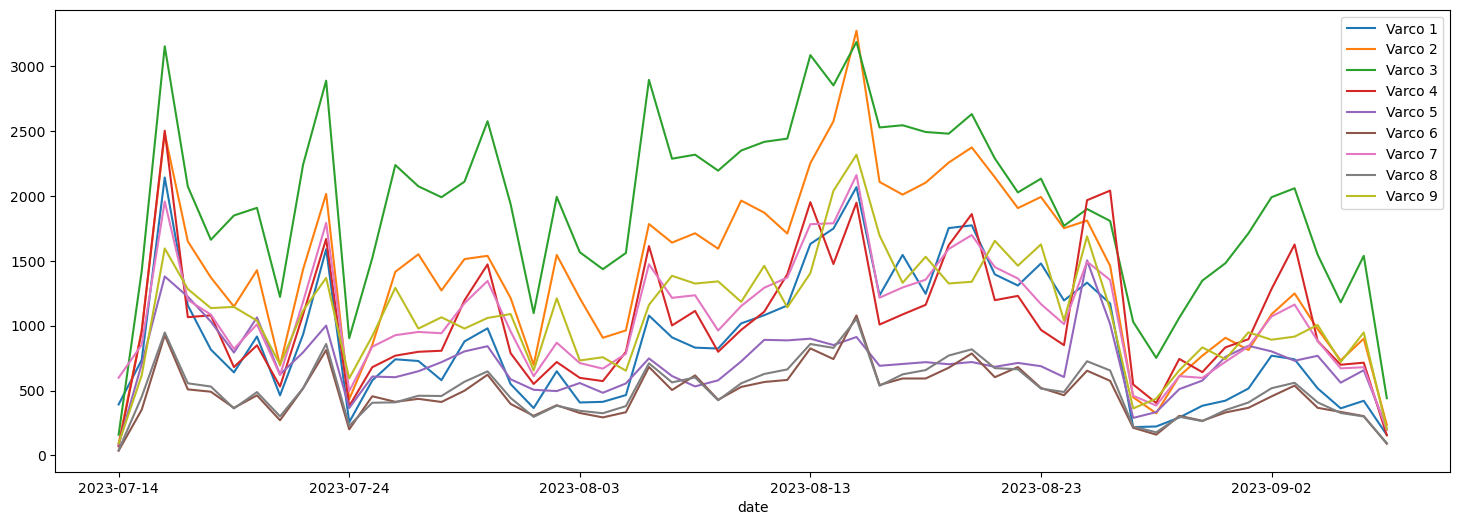

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_passaggi_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "date", y = "presenze", ax=ax, label=x.name)
contapersone_passaggi_df.groupby("varco").apply(g_plot)
plt.show()

## Contapersone presenze

In [20]:
contapersone_presenze_df.rename(columns={"data": "date"}, inplace=True)
contapersone_presenze_df

,date,varco,presenze
0,2023-07-15,Varco 1,183
1,2023-07-15,Varco 2,204
2,2023-07-15,Varco 3,304
3,2023-07-15,Varco 4,199
4,2023-07-15,Varco 5,117
...,...,...,...
625,2023-09-22,Varco 5,127
626,2023-09-22,Varco 6,77
627,2023-09-22,Varco 7,199
628,2023-09-22,Varco 8,73


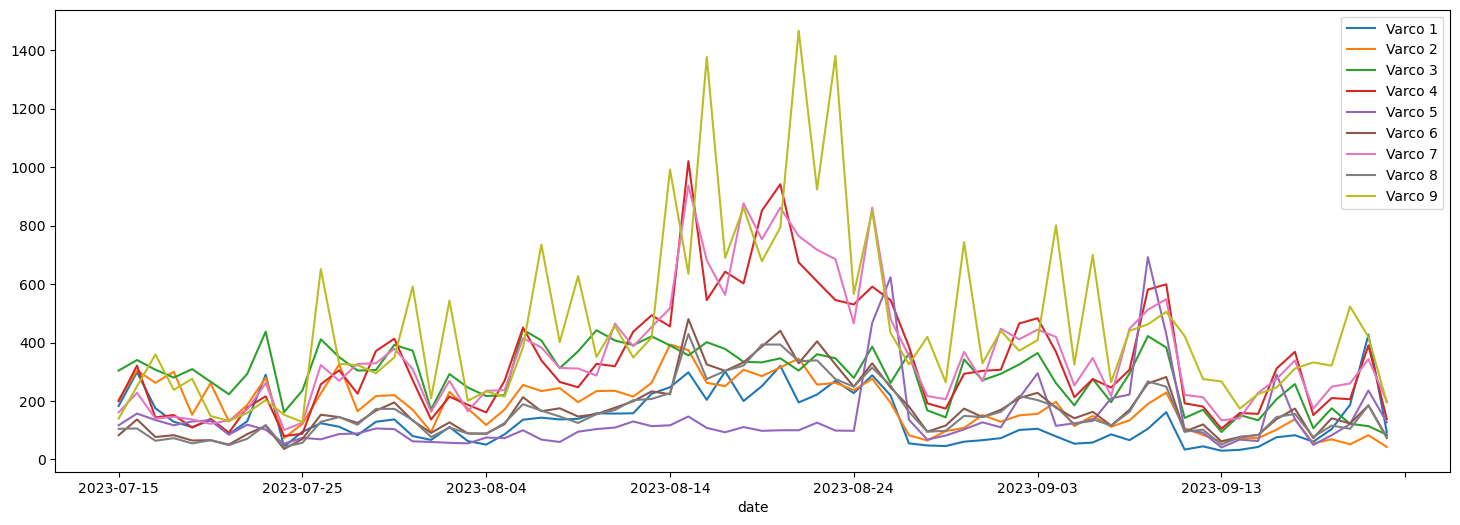

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_presenze_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "date", y = "presenze", ax=ax, label=x.name)
contapersone_presenze_df.groupby("varco").apply(g_plot)
plt.show()

## Contamezzi

### Contamezzi descrizione sensore

In [93]:
contamezzi_descrizione_sensore_df

,sensore,direzione,latitudine,longitudine,descrizione_direzione
0,M40,1,46.146086,10.972362,ENTRATA A MOLVENO da Andalo
1,M40,2,46.146086,10.972362,USCITA DA MOLVENO verso Andalo
2,M42,2,46.130443,10.968595,ENTRATA A MOLVENO da S. Lorenzo Dorsino
3,M42,1,46.130443,10.968595,USCITA DA MOLVENO verso S. Lorenzo Dorsino
4,M47,1,46.140916,10.963959,ENTRATA ALLA SPIAGGIA DI MOLVENO
5,M47,2,46.140916,10.963959,USCITA DALLA SPIAGGIA DI MOLVENO


In [94]:
map_molveno = folium.Map(location=[46.146086, 10.972362], tiles="OpenStreetMap", zoom_start=14)
for index, location_info in contamezzi_descrizione_sensore_df.iterrows():
    folium.Marker([location_info["latitudine"], location_info["longitudine"]], popup=location_info["descrizione_direzione"]).add_to(map_molveno)
map_molveno

### Contamezzi Molveno

In [95]:
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df

,date,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13821,2023-10-04 21:00:00,M47,2,MOLVENO,11,0,0,0,0,0,0,0
13822,2023-10-04 22:00:00,M47,1,MOLVENO,1,2,0,0,0,0,0,0
13823,2023-10-04 22:00:00,M47,2,MOLVENO,3,0,0,0,0,0,0,0
13824,2023-10-04 23:00:00,M47,1,MOLVENO,4,1,0,0,0,0,0,0


### Enrich the dataset - split the date and provide total cars

In [96]:
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["date"] >= START_DATE) &
    (contamezzi_df["date"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)
contamezzi_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1,2023-06-29,9,97
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3,2023-06-29,9,74
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2,2023-06-29,10,225
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6,2023-06-29,10,165
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4,2023-06-29,11,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13629,2023-09-30 21:00:00,M47,2,MOLVENO,22,2,0,0,0,0,0,0,2023-09-30,21,24
13630,2023-09-30 22:00:00,M47,1,MOLVENO,18,0,0,0,0,0,0,1,2023-09-30,22,19
13631,2023-09-30 22:00:00,M47,2,MOLVENO,26,2,0,0,1,0,0,1,2023-09-30,22,30
13632,2023-09-30 23:00:00,M47,1,MOLVENO,7,1,1,0,0,0,0,0,2023-09-30,23,9


In [97]:
contamezzi_df.dtypes

date           datetime64[ns]
sensore                object
direzione               int64
comune                 object
cl1                     int64
cl2                     int64
cl3                     int64
cl4                     int64
cl5                     int64
cl6                     int64
cl7                     int64
nonrilevato             int64
day            datetime64[ns]
hour                    int32
total_cars              int64
dtype: object

### Example of filtering per specific day

In [98]:
contamezzi_df[(contamezzi_df["day"] >= "2023-06-29") & (contamezzi_df["day"] <= "2023-06-30")]

,date,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1,2023-06-29,9,97
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3,2023-06-29,9,74
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2,2023-06-29,10,225
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6,2023-06-29,10,165
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4,2023-06-29,11,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,2023-06-30 21:00:00,M47,2,MOLVENO,22,2,0,0,0,0,0,0,2023-06-30,21,24
9214,2023-06-30 22:00:00,M47,1,MOLVENO,20,1,1,0,0,0,0,0,2023-06-30,22,22
9215,2023-06-30 22:00:00,M47,2,MOLVENO,20,0,0,0,0,0,0,1,2023-06-30,22,21
9216,2023-06-30 23:00:00,M47,1,MOLVENO,14,2,0,1,0,0,0,1,2023-06-30,23,18


## Summarize the presence of cars

### Entrate da Andalo (sensore M40)

In [29]:
entrata_andalo = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 1)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
entrata_andalo = entrata_andalo.reset_index()
entrata_andalo["day"] = pd.to_datetime(pd.to_datetime(entrata_andalo["date"]).dt.date)
entrata_andalo

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,76,16,1,1,2,0,0,1,97,2023-06-29
1,2023-06-29 10:00:00,166,44,5,3,4,1,0,2,225,2023-06-29
2,2023-06-29 11:00:00,147,38,4,8,3,0,0,4,204,2023-06-29
3,2023-06-29 12:00:00,136,34,7,4,1,0,0,5,187,2023-06-29
4,2023-06-29 13:00:00,78,21,7,6,1,1,2,1,117,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2224,2023-09-30 01:00:00,10,2,0,0,0,0,0,0,12,2023-09-30
2225,2023-09-30 02:00:00,3,2,0,0,0,0,0,0,5,2023-09-30
2226,2023-09-30 03:00:00,5,0,0,0,0,0,0,0,5,2023-09-30
2227,2023-09-30 04:00:00,1,1,0,0,0,0,0,0,2,2023-09-30


#### Entrate in un giorno specifico

In [30]:
entrata_andalo.dtypes

date           datetime64[ns]
cl1                     int64
cl2                     int64
cl3                     int64
cl4                     int64
cl5                     int64
cl6                     int64
cl7                     int64
nonrilevato             int64
total_cars              int64
day            datetime64[ns]
dtype: object

In [31]:
entrata_andalo[entrata_andalo["day"] == SPECIFIC_DAY]

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,76,16,1,1,2,0,0,1,97,2023-06-29
1,2023-06-29 10:00:00,166,44,5,3,4,1,0,2,225,2023-06-29
2,2023-06-29 11:00:00,147,38,4,8,3,0,0,4,204,2023-06-29
3,2023-06-29 12:00:00,136,34,7,4,1,0,0,5,187,2023-06-29
4,2023-06-29 13:00:00,78,21,7,6,1,1,2,1,117,2023-06-29
5,2023-06-29 14:00:00,126,28,7,5,2,0,0,6,174,2023-06-29
6,2023-06-29 15:00:00,115,32,9,3,2,1,0,4,166,2023-06-29
7,2023-06-29 16:00:00,122,33,14,6,0,1,0,4,180,2023-06-29
8,2023-06-29 17:00:00,129,41,11,3,3,0,0,2,189,2023-06-29
9,2023-06-29 18:00:00,133,28,4,7,1,0,0,1,174,2023-06-29


<AxesSubplot: xlabel='date'>

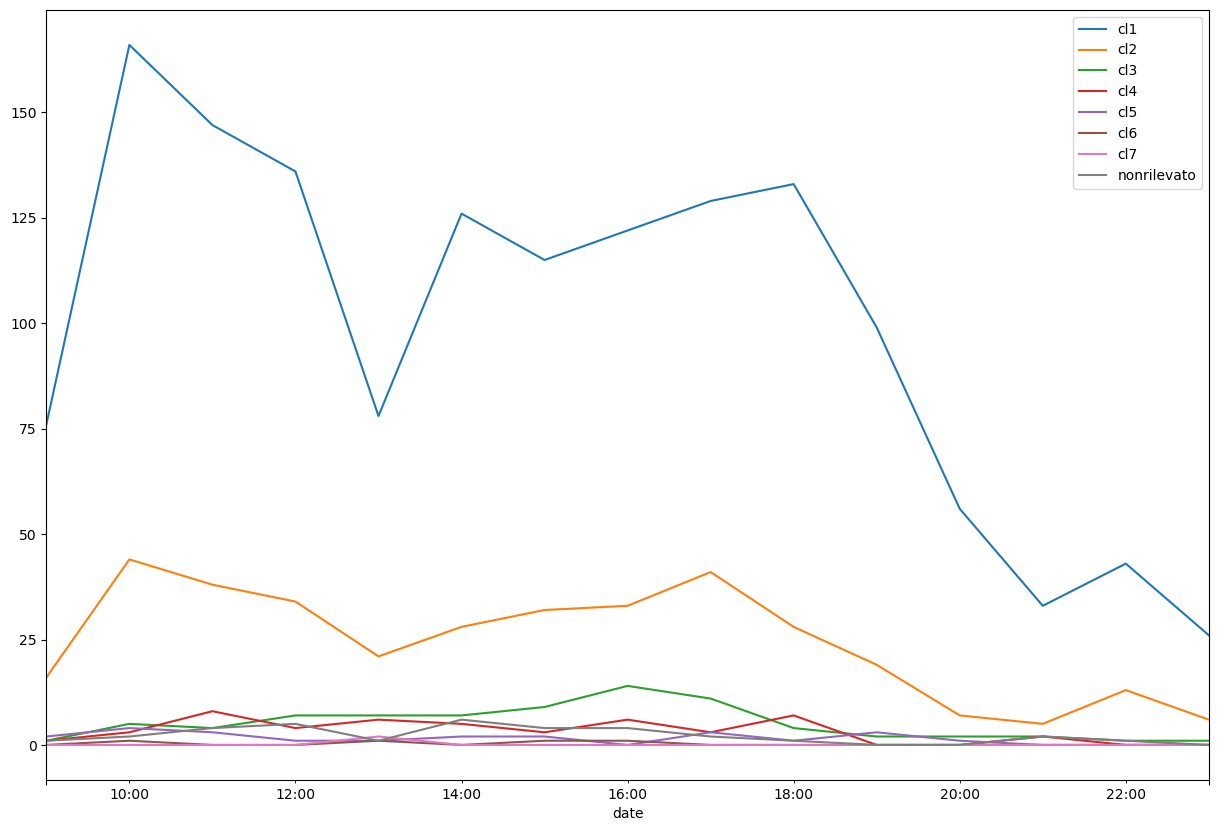

In [32]:
entrata_andalo[entrata_andalo["day"] == "2023-06-29"][["date", "cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].plot(x="date", figsize=(15, 10))

### Uscite da Andalo (sensore M40)

In [33]:
uscita_andalo = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 2)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
uscita_andalo = uscita_andalo.reset_index()
uscita_andalo["day"] = pd.to_datetime(pd.to_datetime(uscita_andalo["date"]).dt.date)
uscita_andalo

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,53,12,4,0,2,0,0,3,74,2023-06-29
1,2023-06-29 10:00:00,116,31,5,6,1,0,0,6,165,2023-06-29
2,2023-06-29 11:00:00,109,22,7,2,2,0,0,4,146,2023-06-29
3,2023-06-29 12:00:00,98,19,8,1,5,1,0,0,132,2023-06-29
4,2023-06-29 13:00:00,91,11,2,2,0,1,0,1,108,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2224,2023-09-30 01:00:00,2,0,0,0,0,0,0,0,2,2023-09-30
2225,2023-09-30 02:00:00,1,0,0,0,0,0,0,0,1,2023-09-30
2226,2023-09-30 03:00:00,0,1,0,0,0,0,0,0,1,2023-09-30
2227,2023-09-30 04:00:00,2,0,0,0,0,0,0,0,2,2023-09-30


#### Uscite in un giorno specifico

In [34]:
uscita_andalo[uscita_andalo["day"] == SPECIFIC_DAY]

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,53,12,4,0,2,0,0,3,74,2023-06-29
1,2023-06-29 10:00:00,116,31,5,6,1,0,0,6,165,2023-06-29
2,2023-06-29 11:00:00,109,22,7,2,2,0,0,4,146,2023-06-29
3,2023-06-29 12:00:00,98,19,8,1,5,1,0,0,132,2023-06-29
4,2023-06-29 13:00:00,91,11,2,2,0,1,0,1,108,2023-06-29
5,2023-06-29 14:00:00,110,16,2,4,6,0,0,2,140,2023-06-29
6,2023-06-29 15:00:00,123,12,6,2,1,0,0,4,148,2023-06-29
7,2023-06-29 16:00:00,142,14,7,2,2,0,0,3,170,2023-06-29
8,2023-06-29 17:00:00,144,23,7,2,3,0,0,2,181,2023-06-29
9,2023-06-29 18:00:00,118,14,2,3,7,0,0,2,146,2023-06-29


<AxesSubplot: xlabel='date'>

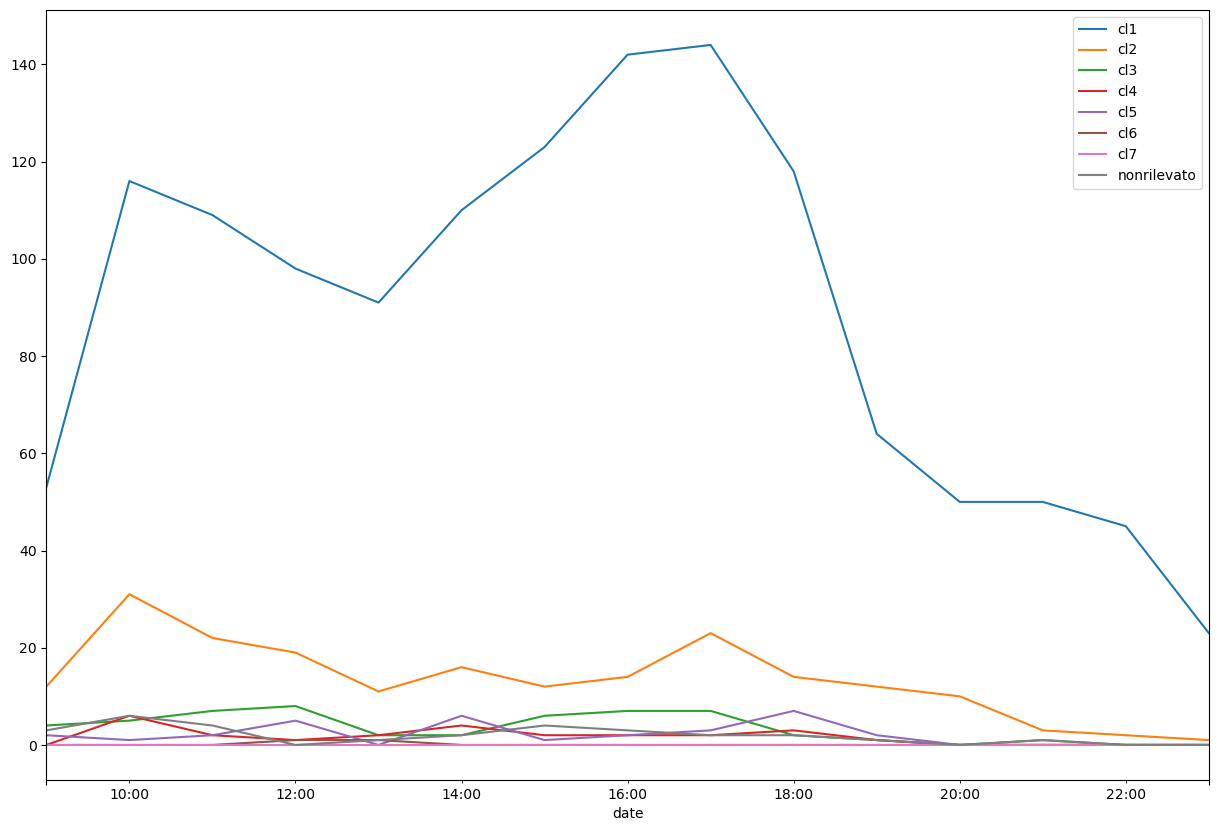

In [35]:
uscita_andalo[uscita_andalo["day"] == SPECIFIC_DAY][["date", "cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].plot(x="date", figsize=(15, 10))

### Find the differences of entry/exit from Andalo

In [36]:
diff_andalo_df = entrata_andalo.set_index(["date", "day"]).subtract(uscita_andalo.set_index(["date", "day"])).reset_index()
diff_andalo_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 09:00:00,2023-06-29,23,4,-3,1,0,0,0,-2,23
1,2023-06-29 10:00:00,2023-06-29,50,13,0,-3,3,1,0,-4,60
2,2023-06-29 11:00:00,2023-06-29,38,16,-3,6,1,0,0,0,58
3,2023-06-29 12:00:00,2023-06-29,38,15,-1,3,-4,-1,0,5,55
4,2023-06-29 13:00:00,2023-06-29,-13,10,5,4,1,0,2,0,9
...,...,...,...,...,...,...,...,...,...,...,...
2224,2023-09-30 01:00:00,2023-09-30,8,2,0,0,0,0,0,0,10
2225,2023-09-30 02:00:00,2023-09-30,2,2,0,0,0,0,0,0,4
2226,2023-09-30 03:00:00,2023-09-30,5,-1,0,0,0,0,0,0,4
2227,2023-09-30 04:00:00,2023-09-30,-1,1,0,0,0,0,0,0,0


#### Total cars inside Molveno in one specific day (Based only on Andalo Sensors)

<AxesSubplot: xlabel='date'>

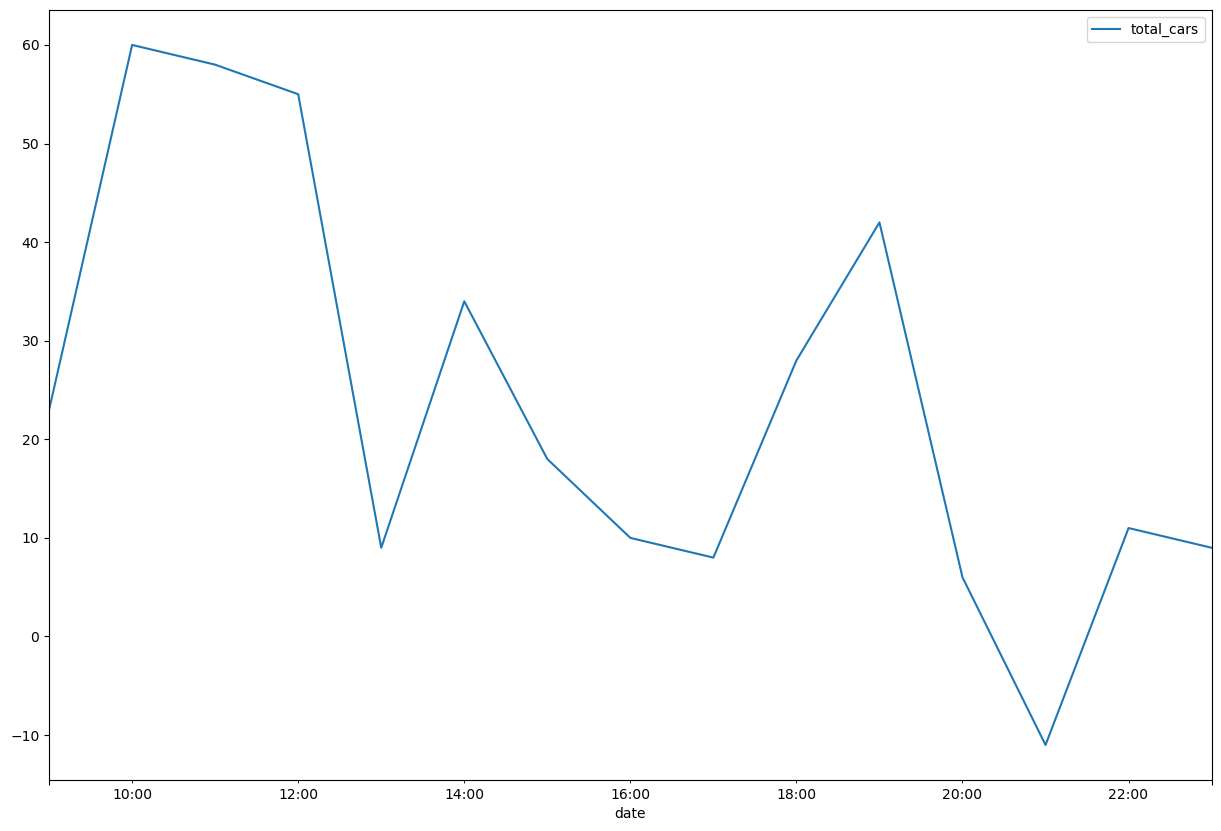

In [37]:
diff_andalo_df[diff_andalo_df["day"] == SPECIFIC_DAY][["date", "total_cars"]].plot(x="date", figsize=(15, 10))

#### Calculate cumulativa Andalo

In [38]:
cumulativa_andalo_df = diff_andalo_df.set_index(["date", "day"]).cumsum().reset_index()
cumulativa_andalo_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 09:00:00,2023-06-29,23,4,-3,1,0,0,0,-2,23
1,2023-06-29 10:00:00,2023-06-29,73,17,-3,-2,3,1,0,-6,83
2,2023-06-29 11:00:00,2023-06-29,111,33,-6,4,4,1,0,-6,141
3,2023-06-29 12:00:00,2023-06-29,149,48,-7,7,0,0,0,-1,196
4,2023-06-29 13:00:00,2023-06-29,136,58,-2,11,1,0,2,-1,205
...,...,...,...,...,...,...,...,...,...,...,...
2224,2023-09-30 01:00:00,2023-09-30,6574,15650,5072,2773,-67,250,-35,-155,30062
2225,2023-09-30 02:00:00,2023-09-30,6576,15652,5072,2773,-67,250,-35,-155,30066
2226,2023-09-30 03:00:00,2023-09-30,6581,15651,5072,2773,-67,250,-35,-155,30070
2227,2023-09-30 04:00:00,2023-09-30,6580,15652,5072,2773,-67,250,-35,-155,30070


<AxesSubplot: xlabel='date'>

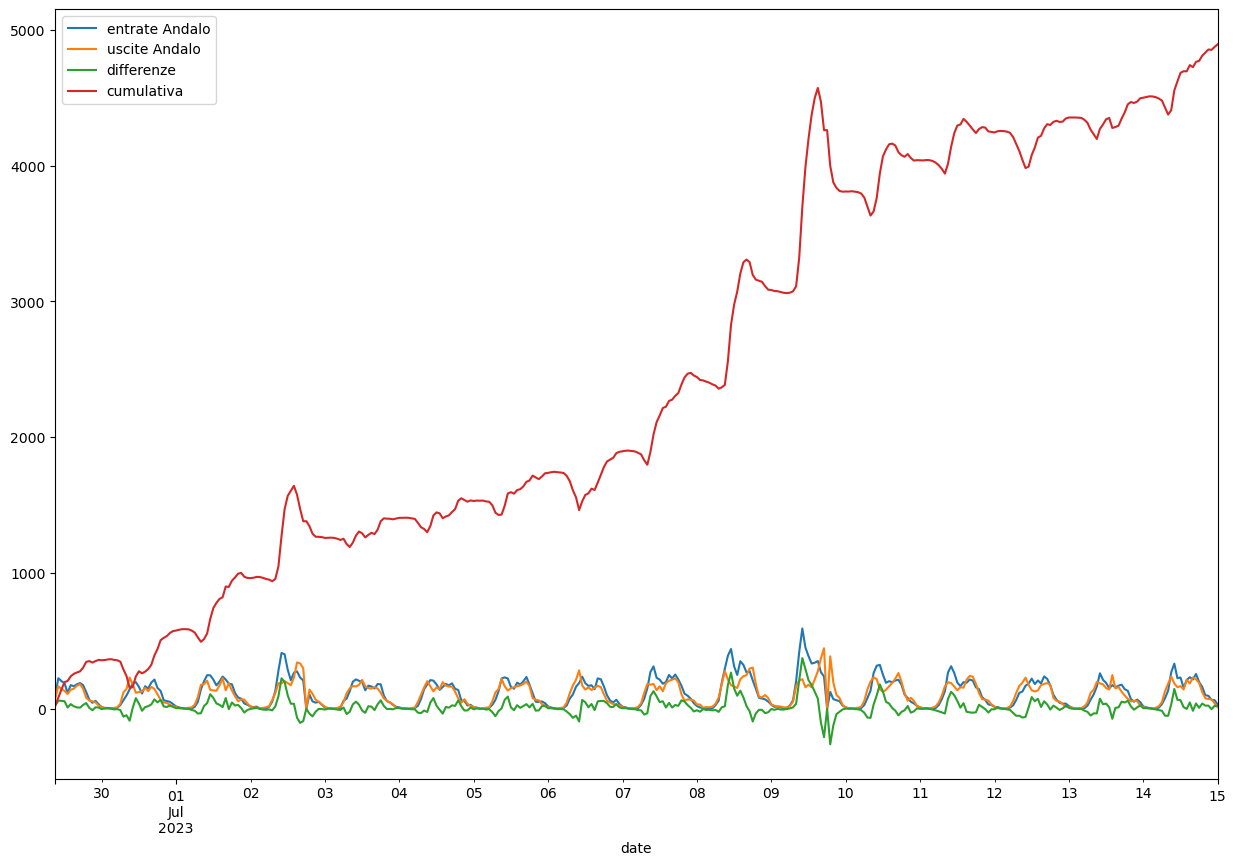

In [39]:
ax = entrata_andalo[entrata_andalo["date"] <= "2023-07-15"].plot(x="date", y="total_cars", label="entrate Andalo", figsize=(15, 10))
uscita_andalo[uscita_andalo["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="uscite Andalo", figsize=(15, 10))
diff_andalo_df[diff_andalo_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="differenze", figsize=(15, 10))
cumulativa_andalo_df[cumulativa_andalo_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15, 10))

### Entrate da  Dorsino (sensore M42)

In [40]:
entrata_dorsino = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 2)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
entrata_dorsino = entrata_dorsino.reset_index()
entrata_dorsino["day"] = pd.to_datetime(pd.to_datetime(entrata_dorsino["date"]).dt.date)
entrata_dorsino

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 10:00:00,32,5,0,0,0,0,0,0,37,2023-06-29
1,2023-06-29 11:00:00,63,5,1,0,1,0,1,1,72,2023-06-29
2,2023-06-29 12:00:00,42,11,0,0,0,0,0,0,53,2023-06-29
3,2023-06-29 13:00:00,44,4,2,0,2,0,0,2,54,2023-06-29
4,2023-06-29 14:00:00,55,8,0,1,0,0,0,1,65,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,22,4,2,0,0,0,0,0,28,2023-09-30
2242,2023-09-30 20:00:00,14,0,1,0,0,0,0,0,15,2023-09-30
2243,2023-09-30 21:00:00,14,1,0,0,0,0,0,0,15,2023-09-30
2244,2023-09-30 22:00:00,11,1,0,0,0,0,0,0,12,2023-09-30


### Uscite da Dorsino

In [41]:
uscita_dorsino = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 1)].groupby("date")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
uscita_dorsino = uscita_dorsino.reset_index()
uscita_dorsino["day"] = pd.to_datetime(pd.to_datetime(uscita_dorsino["date"]).dt.date)
uscita_dorsino

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 10:00:00,27,5,0,2,0,0,0,2,36,2023-06-29
1,2023-06-29 11:00:00,44,8,4,4,1,0,0,7,68,2023-06-29
2,2023-06-29 12:00:00,52,9,2,3,0,0,0,4,70,2023-06-29
3,2023-06-29 13:00:00,37,6,1,2,0,0,0,2,48,2023-06-29
4,2023-06-29 14:00:00,60,11,2,0,0,0,0,3,76,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,43,7,2,2,1,0,0,4,59,2023-09-30
2242,2023-09-30 20:00:00,25,1,1,0,0,0,0,2,29,2023-09-30
2243,2023-09-30 21:00:00,28,2,0,0,0,0,0,1,31,2023-09-30
2244,2023-09-30 22:00:00,23,2,3,0,0,0,0,2,30,2023-09-30


### Find the differences of entry/exit from Dorsino

In [42]:
diff_dorsino_df = entrata_dorsino.set_index(["date", "day"]).subtract(uscita_dorsino.set_index(["date", "day"])).reset_index()
diff_dorsino_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 10:00:00,2023-06-29,5,0,0,-2,0,0,0,-2,1
1,2023-06-29 11:00:00,2023-06-29,19,-3,-3,-4,0,0,1,-6,4
2,2023-06-29 12:00:00,2023-06-29,-10,2,-2,-3,0,0,0,-4,-17
3,2023-06-29 13:00:00,2023-06-29,7,-2,1,-2,2,0,0,0,6
4,2023-06-29 14:00:00,2023-06-29,-5,-3,-2,1,0,0,0,-2,-11
...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,2023-09-30,-21,-3,0,-2,-1,0,0,-4,-31
2242,2023-09-30 20:00:00,2023-09-30,-11,-1,0,0,0,0,0,-2,-14
2243,2023-09-30 21:00:00,2023-09-30,-14,-1,0,0,0,0,0,-1,-16
2244,2023-09-30 22:00:00,2023-09-30,-12,-1,-3,0,0,0,0,-2,-18


#### Total cars inside Molveno in one specific day (Based only on Dorsino Sensors)

<AxesSubplot: xlabel='date'>

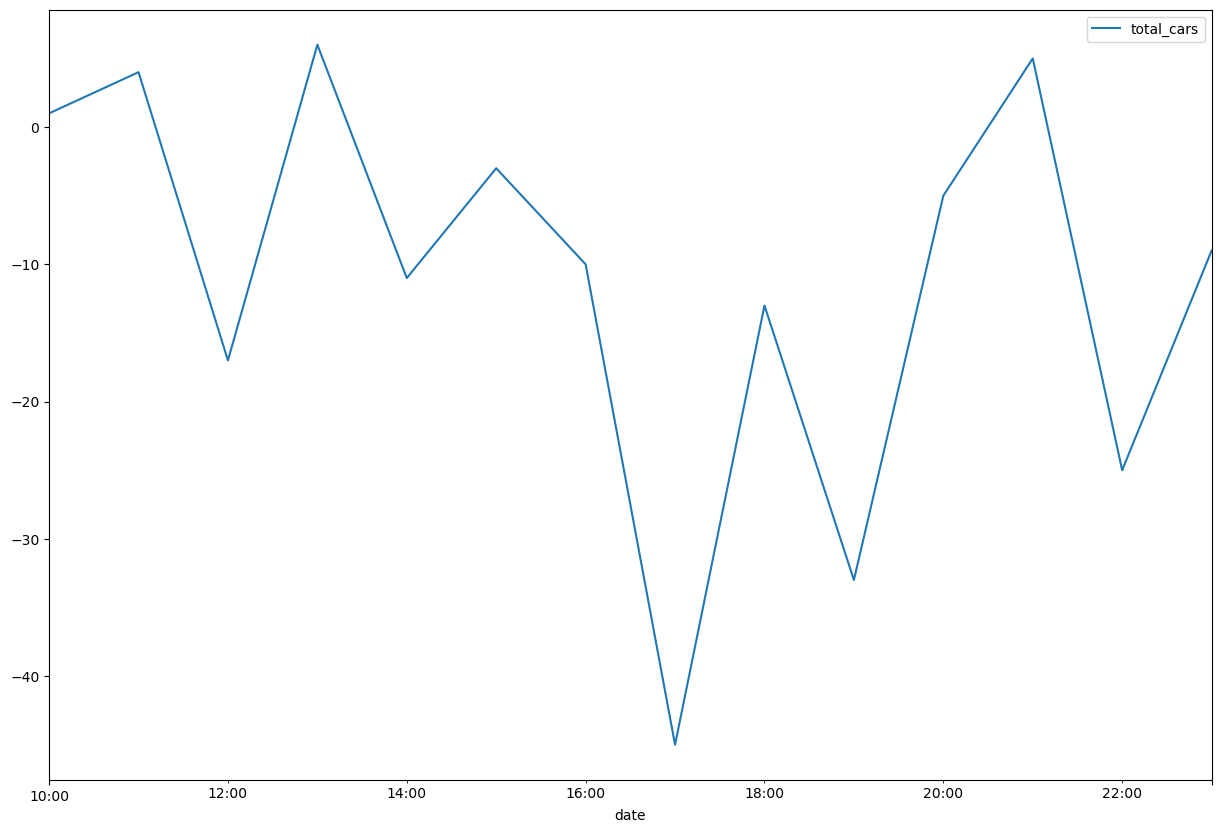

In [43]:
diff_dorsino_df[diff_dorsino_df["day"] == SPECIFIC_DAY][["date", "total_cars"]].plot(x="date", y="total_cars", figsize=(15, 10))

#### Calculate cumulativa Dorsino

In [44]:
cumulativa_dorsino_df = diff_dorsino_df.set_index(["date", "day"]).cumsum().reset_index()
cumulativa_dorsino_df

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 10:00:00,2023-06-29,5,0,0,-2,0,0,0,-2,1
1,2023-06-29 11:00:00,2023-06-29,24,-3,-3,-6,0,0,1,-8,5
2,2023-06-29 12:00:00,2023-06-29,14,-1,-5,-9,0,0,1,-12,-12
3,2023-06-29 13:00:00,2023-06-29,21,-3,-4,-11,2,0,1,-12,-6
4,2023-06-29 14:00:00,2023-06-29,16,-6,-6,-10,2,0,1,-14,-17
...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,2023-09-30,14373,-7766,-3900,-1846,-1098,-94,122,-4681,-4890
2242,2023-09-30 20:00:00,2023-09-30,14362,-7767,-3900,-1846,-1098,-94,122,-4683,-4904
2243,2023-09-30 21:00:00,2023-09-30,14348,-7768,-3900,-1846,-1098,-94,122,-4684,-4920
2244,2023-09-30 22:00:00,2023-09-30,14336,-7769,-3903,-1846,-1098,-94,122,-4686,-4938


<AxesSubplot: xlabel='date'>

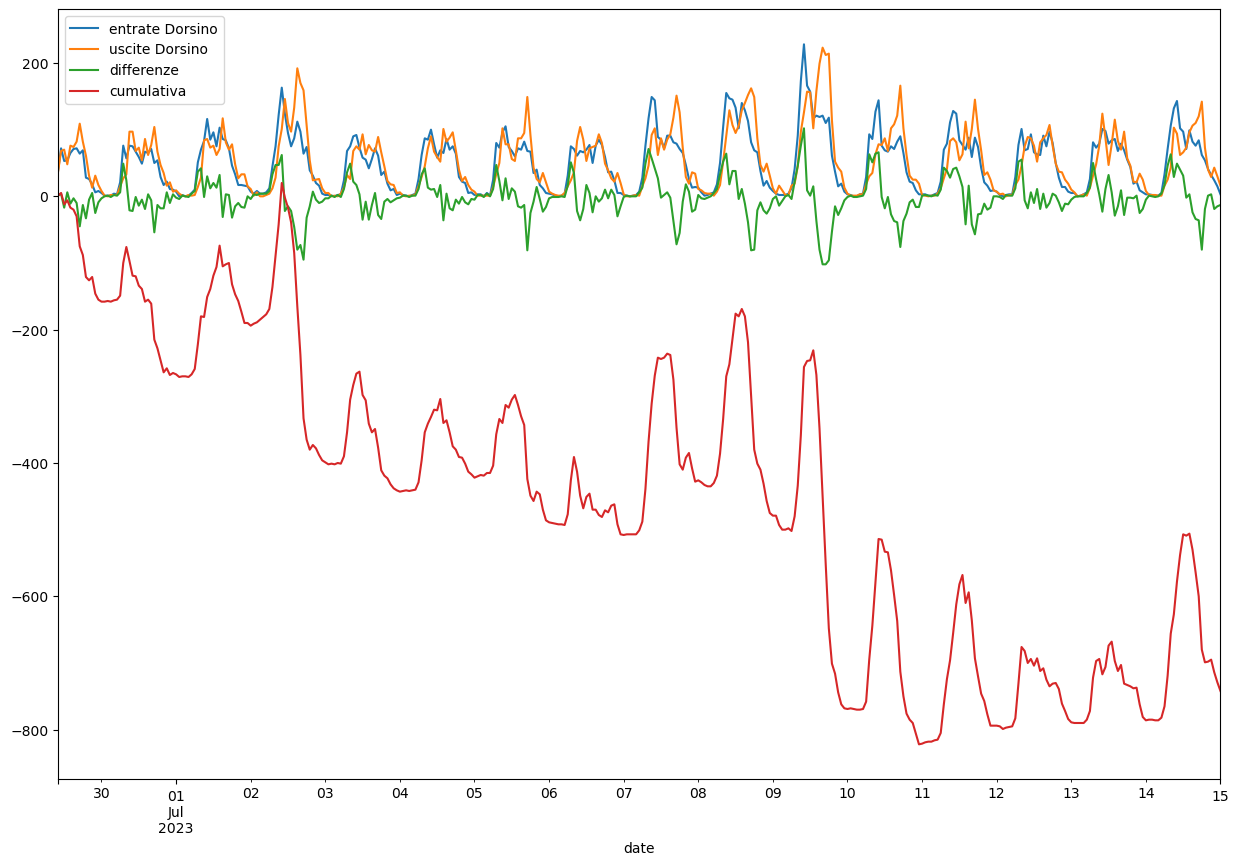

In [45]:
ax = entrata_dorsino[entrata_dorsino["date"] <= "2023-07-15"].plot(x="date", y="total_cars", label="entrate Dorsino", figsize=(15, 10))
uscita_dorsino[uscita_dorsino["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="uscite Dorsino", figsize=(15, 10))
diff_dorsino_df[diff_dorsino_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="differenze", figsize=(15, 10))
cumulativa_dorsino_df[cumulativa_dorsino_df["date"] <= "2023-07-15"].plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15, 10))

### Entrate spiaggia

In [227]:
entrata_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] <= END_DATE)]
entrata_lago = entrata_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])
entrata_lago

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour
0,2023-06-29 10:00:00,98,23,6,3,0,1,0,13,2023-06-29,10
1,2023-06-29 11:00:00,130,18,7,4,4,0,0,2,2023-06-29,11
2,2023-06-29 12:00:00,101,18,6,3,0,0,0,7,2023-06-29,12
3,2023-06-29 13:00:00,81,9,2,6,1,0,0,4,2023-06-29,13
4,2023-06-29 14:00:00,102,10,3,4,1,0,0,6,2023-06-29,14
...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,51,5,0,0,0,0,1,1,2023-09-30,19
2242,2023-09-30 20:00:00,29,5,1,1,0,0,0,0,2023-09-30,20
2243,2023-09-30 21:00:00,12,2,0,0,0,0,0,0,2023-09-30,21
2244,2023-09-30 22:00:00,18,0,0,0,0,0,0,1,2023-09-30,22


### Uscita spiaggia

In [47]:
uscita_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] <= END_DATE)]
uscita_lago = uscita_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])
uscita_lago

,date,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
0,2023-06-29 10:00:00,63,20,8,2,0,0,0,8,2023-06-29,10,101
1,2023-06-29 11:00:00,94,17,4,2,0,0,0,1,2023-06-29,11,118
2,2023-06-29 12:00:00,84,8,3,3,1,0,0,5,2023-06-29,12,104
3,2023-06-29 13:00:00,67,7,1,1,0,0,0,3,2023-06-29,13,79
4,2023-06-29 14:00:00,100,13,6,0,0,0,0,5,2023-06-29,14,124
...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,59,12,1,0,0,0,0,3,2023-09-30,19,75
2242,2023-09-30 20:00:00,26,4,2,0,0,0,0,0,2023-09-30,20,32
2243,2023-09-30 21:00:00,22,2,0,0,0,0,0,0,2023-09-30,21,24
2244,2023-09-30 22:00:00,26,2,0,0,1,0,0,1,2023-09-30,22,30


### Differences entry/exit spiaggia

In [48]:
differenza_lago = entrata_lago.set_index(['date','day','hour']).subtract(uscita_lago.set_index(['date','day','hour']), fill_value=0).reset_index()
differenza_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 10:00:00,2023-06-29,10,35,3,-2,1,0,1,0,5,43
1,2023-06-29 11:00:00,2023-06-29,11,36,1,3,2,4,0,0,1,47
2,2023-06-29 12:00:00,2023-06-29,12,17,10,3,0,-1,0,0,2,31
3,2023-06-29 13:00:00,2023-06-29,13,14,2,1,5,1,0,0,1,24
4,2023-06-29 14:00:00,2023-06-29,14,2,-3,-3,4,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,2023-09-30,19,-8,-7,-1,0,0,0,1,-2,-17
2242,2023-09-30 20:00:00,2023-09-30,20,3,1,-1,1,0,0,0,0,4
2243,2023-09-30 21:00:00,2023-09-30,21,-10,0,0,0,0,0,0,0,-10
2244,2023-09-30 22:00:00,2023-09-30,22,-8,-2,0,0,-1,0,0,0,-11


#### Cumulative Spiaggia 

In [49]:
cumulativa_lago = differenza_lago.copy()
cumulativa_lago['total_carsX'] = cumulativa_lago['total_cars']
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']:
    cumulativa_lago[c] = cumulativa_lago[c].cumsum()
cumulativa_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,total_carsX
0,2023-06-29 10:00:00,2023-06-29,10,35,3,-2,1,0,1,0,5,43,43
1,2023-06-29 11:00:00,2023-06-29,11,71,4,1,3,4,1,0,6,90,47
2,2023-06-29 12:00:00,2023-06-29,12,88,14,4,3,3,1,0,8,121,31
3,2023-06-29 13:00:00,2023-06-29,13,102,16,5,8,4,1,0,9,145,24
4,2023-06-29 14:00:00,2023-06-29,14,104,13,2,12,5,1,0,10,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,2023-09-30,19,15649,2189,-84,969,1323,-51,-46,-3278,16671,-17
2242,2023-09-30 20:00:00,2023-09-30,20,15652,2190,-85,970,1323,-51,-46,-3278,16675,4
2243,2023-09-30 21:00:00,2023-09-30,21,15642,2190,-85,970,1323,-51,-46,-3278,16665,-10
2244,2023-09-30 22:00:00,2023-09-30,22,15634,2188,-85,970,1322,-51,-46,-3278,16654,-11


<AxesSubplot: xlabel='date'>

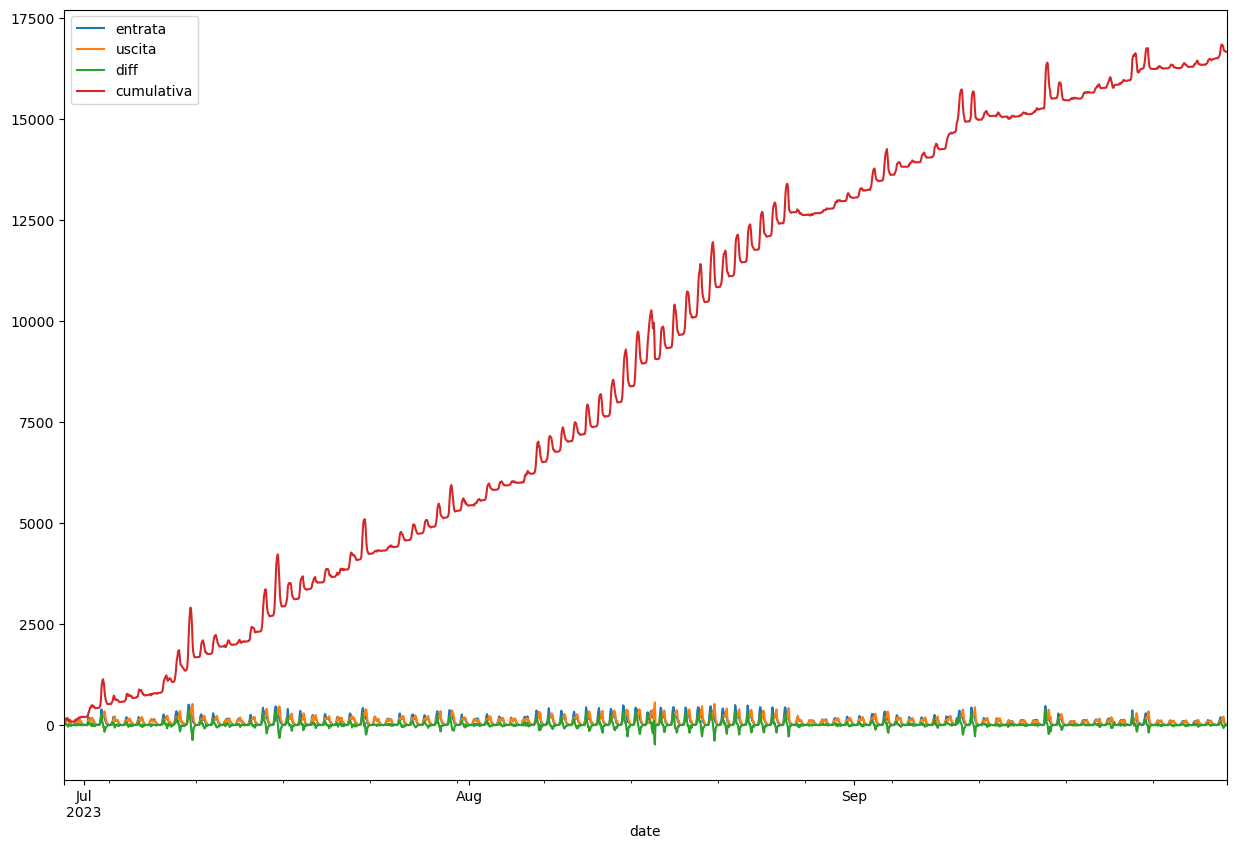

In [50]:
ax = entrata_lago.plot(x="date", y="total_cars", label="entrata", figsize=(15,10))
uscita_lago.plot(ax=ax, x="date", y="total_cars", label="uscita", figsize=(15,10))
differenza_lago.plot(ax=ax, x="date", y="total_cars", label="diff", figsize=(15,10))
cumulativa_lago.plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15,10))

### Notes

- The results indicate that Dorsino sensors detect more car exits than entries.
- The primary entry point for cars is Andalo

### Find the cars present in Molveno by summing up the data from Andalo and Dorsino sensors

In [51]:
present_cars_molveno = diff_dorsino_df.set_index(["date", "day"]).add(diff_andalo_df.set_index(["date", "day"]), fill_value=0).reset_index()
present_cars_molveno

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 09:00:00,2023-06-29,23.0,4.0,-3.0,1.0,0.0,0.0,0.0,-2.0,23.0
1,2023-06-29 10:00:00,2023-06-29,55.0,13.0,0.0,-5.0,3.0,1.0,0.0,-6.0,61.0
2,2023-06-29 11:00:00,2023-06-29,57.0,13.0,-6.0,2.0,1.0,0.0,1.0,-6.0,62.0
3,2023-06-29 12:00:00,2023-06-29,28.0,17.0,-3.0,0.0,-4.0,-1.0,0.0,1.0,38.0
4,2023-06-29 13:00:00,2023-06-29,-6.0,8.0,6.0,2.0,3.0,0.0,2.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
2242,2023-09-30 19:00:00,2023-09-30,-21.0,-3.0,0.0,-2.0,-1.0,0.0,0.0,-4.0,-31.0
2243,2023-09-30 20:00:00,2023-09-30,-11.0,-1.0,0.0,0.0,0.0,0.0,0.0,-2.0,-14.0
2244,2023-09-30 21:00:00,2023-09-30,-14.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-16.0
2245,2023-09-30 22:00:00,2023-09-30,-12.0,-1.0,-3.0,0.0,0.0,0.0,0.0,-2.0,-18.0


<AxesSubplot: xlabel='day'>

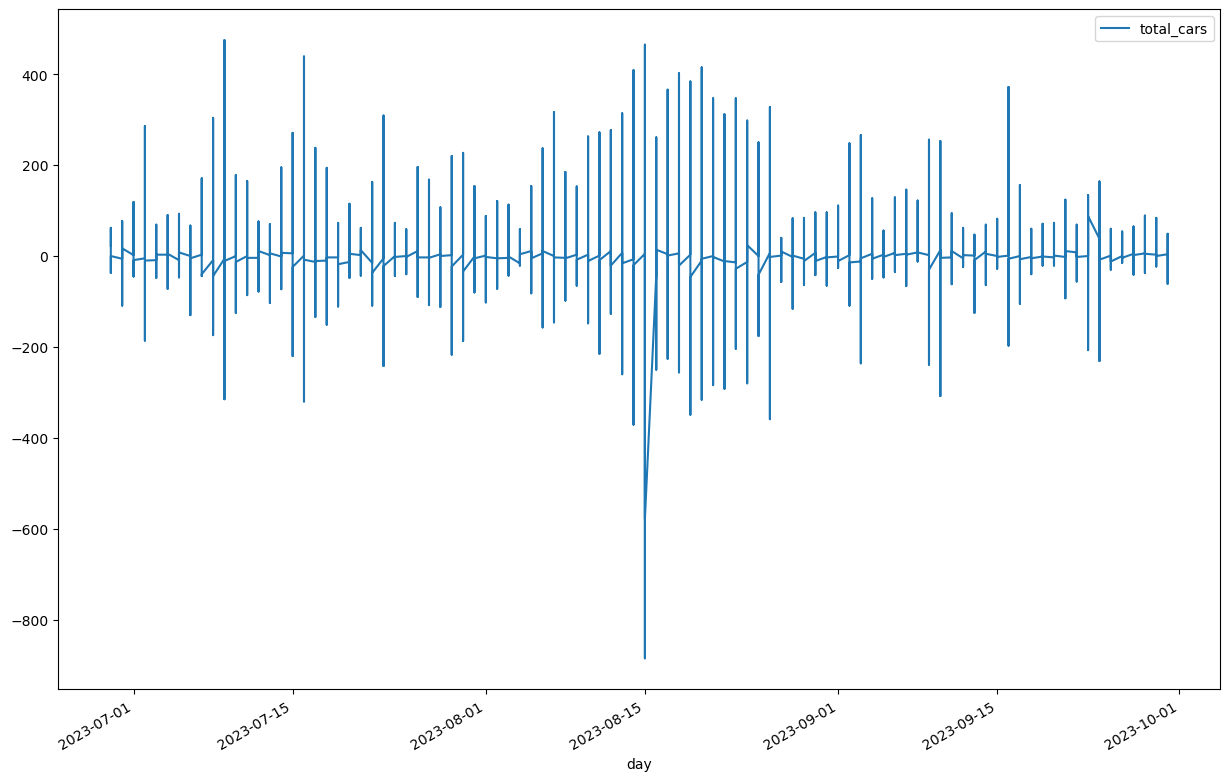

In [112]:
present_cars_molveno.plot(x="day", y="total_cars", figsize=(15, 10))

In [53]:
present_cars_cumulative_molveno = cumulativa_dorsino_df.set_index(["date", "day"]).add(cumulativa_andalo_df.set_index(["date", "day"]), fill_value=0).reset_index()
present_cars_cumulative_molveno[present_cars_cumulative_molveno["date"] <= "2023-07-15"]

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 09:00:00,2023-06-29,23.0,4.0,-3.0,1.0,0.0,0.0,0.0,-2.0,23.0
1,2023-06-29 10:00:00,2023-06-29,78.0,17.0,-3.0,-4.0,3.0,1.0,0.0,-8.0,84.0
2,2023-06-29 11:00:00,2023-06-29,135.0,30.0,-9.0,-2.0,4.0,1.0,1.0,-14.0,146.0
3,2023-06-29 12:00:00,2023-06-29,163.0,47.0,-12.0,-2.0,0.0,0.0,1.0,-13.0,184.0
4,2023-06-29 13:00:00,2023-06-29,157.0,55.0,-6.0,0.0,3.0,0.0,3.0,-13.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...
371,2023-07-14 20:00:00,2023-07-14,2849.0,1775.0,229.0,215.0,-226.0,12.0,17.0,-737.0,4134.0
372,2023-07-14 21:00:00,2023-07-14,2869.0,1779.0,231.0,214.0,-225.0,13.0,17.0,-738.0,4160.0
373,2023-07-14 22:00:00,2023-07-14,2839.0,1788.0,233.0,214.0,-227.0,13.0,17.0,-739.0,4138.0
374,2023-07-14 23:00:00,2023-07-14,2833.0,1795.0,237.0,218.0,-228.0,13.0,17.0,-740.0,4145.0


<AxesSubplot: xlabel='day'>

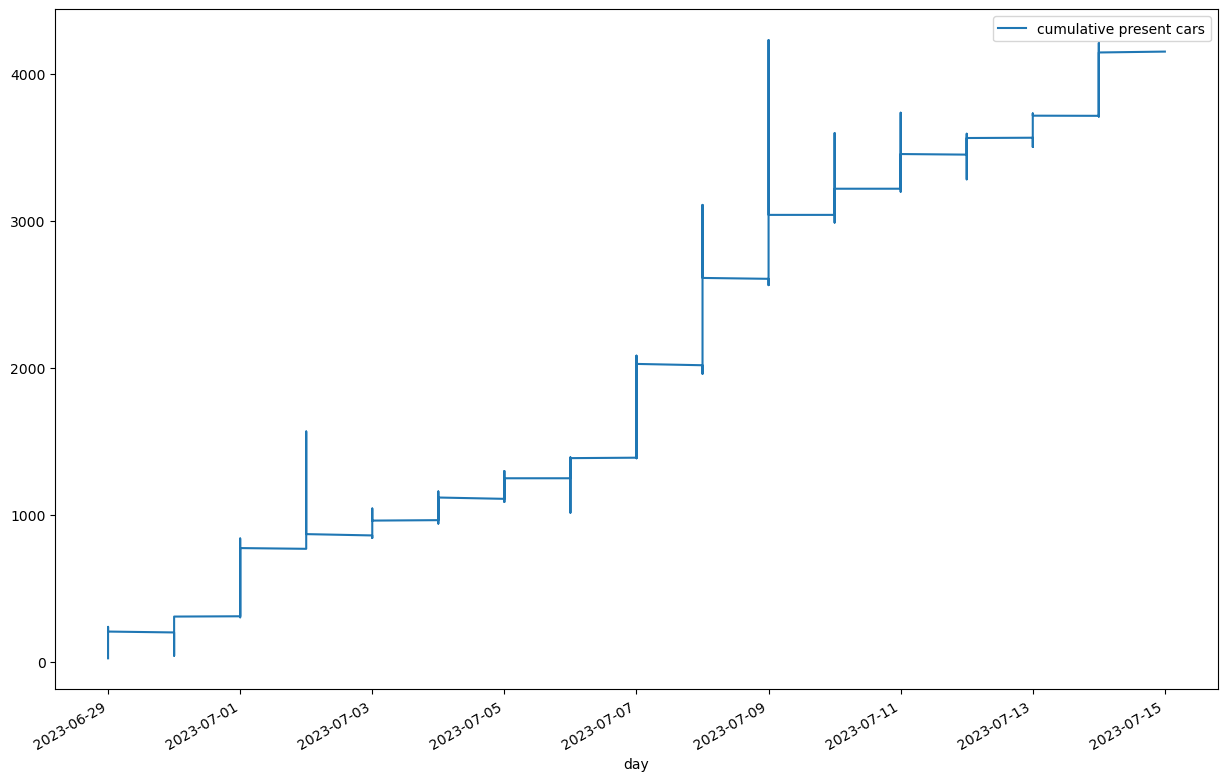

In [54]:
#ax = present_cars_molveno[present_cars_molveno["date"] <= "2023-07-15"].plot(x="day", y="total_cars", label="present cars", figsize=(15, 10))
present_cars_cumulative_molveno[present_cars_cumulative_molveno["date"] <= "2023-07-15"].plot(x="day", y="total_cars", label="cumulative present cars", figsize=(15, 10))

#### Visualize cars present in Molveno in one specific day 

In [55]:
specific_day = present_cars_molveno[
    (present_cars_molveno["day"] == "2023-07-15")]
specific_day

,date,day,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
375,2023-07-15 00:00:00,2023-07-15,7.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,6.0
376,2023-07-15 01:00:00,2023-07-15,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
377,2023-07-15 02:00:00,2023-07-15,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
378,2023-07-15 03:00:00,2023-07-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
379,2023-07-15 04:00:00,2023-07-15,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0
380,2023-07-15 05:00:00,2023-07-15,-11.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.0
381,2023-07-15 06:00:00,2023-07-15,10.0,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,10.0
382,2023-07-15 07:00:00,2023-07-15,31.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,39.0
383,2023-07-15 08:00:00,2023-07-15,75.0,24.0,0.0,4.0,-3.0,0.0,0.0,-2.0,98.0
384,2023-07-15 09:00:00,2023-07-15,141.0,26.0,5.0,-1.0,-2.0,0.0,0.0,-2.0,167.0


<AxesSubplot: xlabel='date'>

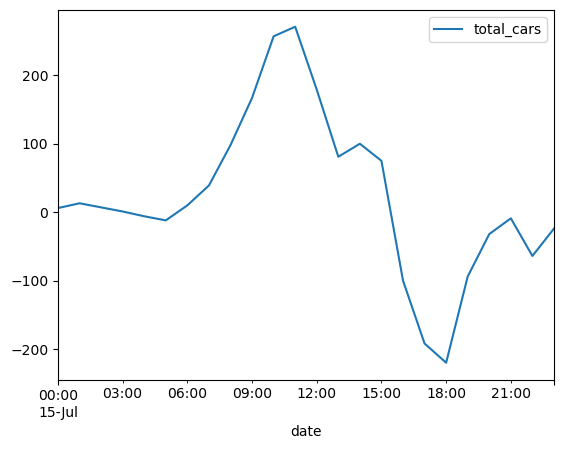

In [56]:
specific_day.plot(x="date", y="total_cars")

# Movimento turistico

In [9]:
movimento_turistico_timeframe = movimento_turistico_molveno_df[
    (movimento_turistico_molveno_df["date"] >= START_DATE) &
    (movimento_turistico_molveno_df["date"] <= END_DATE)
]
movimento_turistico_timeframe

,anno,mese,date,territorio_comunale,arrivi,presenze
516,2023,06,2023-06-01,MOLVENO,785,1497
517,2023,06,2023-06-02,MOLVENO,969,2271
518,2023,06,2023-06-03,MOLVENO,397,2233
519,2023,06,2023-06-04,MOLVENO,437,1076
520,2023,06,2023-06-05,MOLVENO,259,1082
...,...,...,...,...,...,...
633,2023,09,2023-09-26,MOLVENO,293,1103
634,2023,09,2023-09-27,MOLVENO,177,1013
635,2023,09,2023-09-28,MOLVENO,237,1018
636,2023,09,2023-09-29,MOLVENO,538,1263


<AxesSubplot: xlabel='date'>

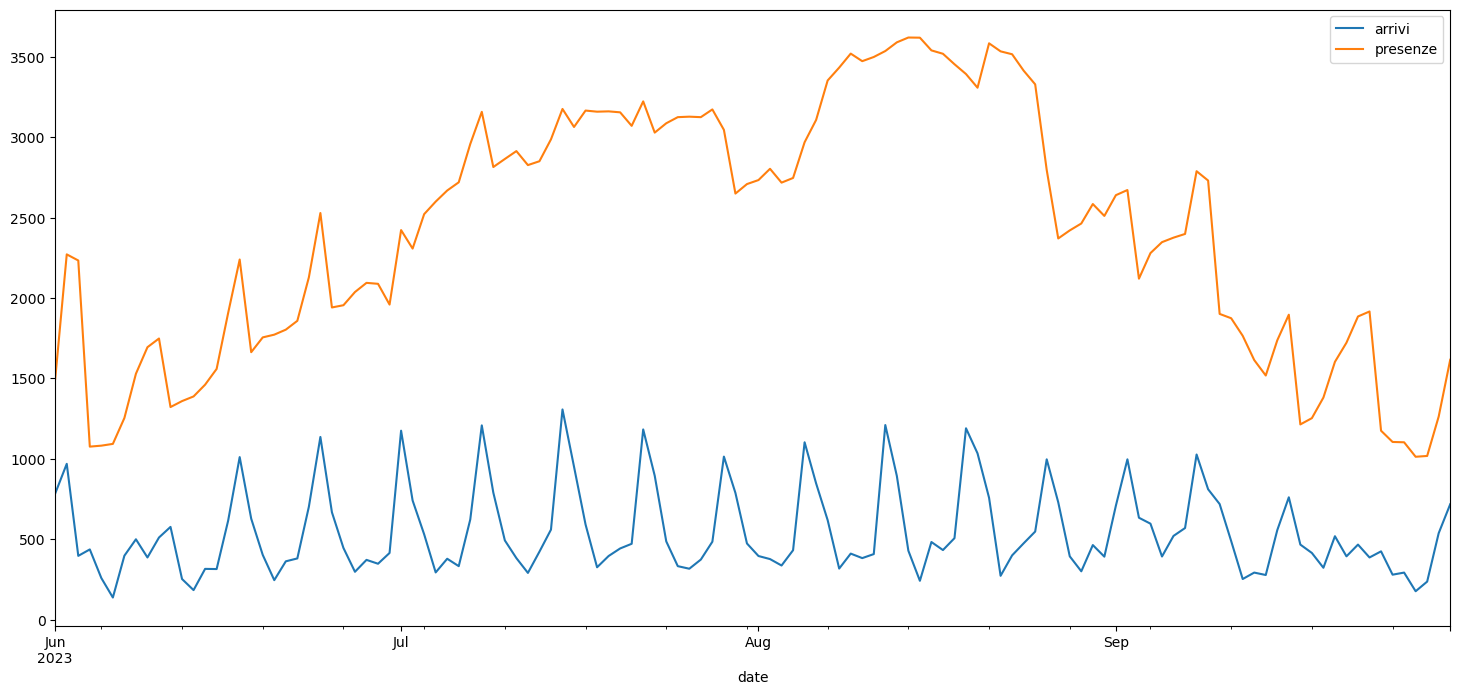

In [10]:
movimento_turistico_timeframe.plot(x="date", y=["arrivi", "presenze"], figsize=(18, 8))

# Meteo Trentino bollettino

In [11]:
meteotrentino_bollettino_df.rename(columns={"data": "date"}, inplace=True)
meteotrentino_bollettino_df["date"] = pd.to_datetime(meteotrentino_bollettino_df["date"])
meteo_timeframe_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["date"] >= START_DATE) &
    (meteotrentino_bollettino_df["date"] <= "2023-08-30")
]
meteo_timeframe_df

,date,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18
36356,2023-06-01,MOLVENO,DOLOMITI,Poco nuvoloso,10,23,molto bassa,debole,molto bassa,bassa,debole,bassa
36378,2023-06-02,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,7,24,molto bassa,debole,molto bassa,bassa,debole,media
36400,2023-06-03,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,9,17,bassa,debole,bassa,media,debole,media
36422,2023-06-05,MOLVENO,DOLOMITI,Molto nuvoloso con piogge deboli,10,18,media,debole,bassa,media,debole,media
36444,2023-06-06,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,8,21,bassa,debole,bassa,media,debole,bassa
36466,2023-06-07,MOLVENO,DOLOMITI,Nuvoloso,11,19,bassa,debole,bassa,media,debole,bassa
36488,2023-06-08,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,10,24,bassa,debole,bassa,media,debole,bassa
36510,2023-06-09,MOLVENO,DOLOMITI,Poco nuvoloso,10,24,molto bassa,debole,molto bassa,bassa,debole,bassa
36532,2023-06-13,MOLVENO,DOLOMITI,Molto nuvoloso con piogge deboli,14,22,bassa,debole,molto bassa,media,moderata,bassa
36554,2023-06-14,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,13,22,bassa,debole,molto bassa,media,moderata,bassa


In [12]:
meteotrentino_bollettino_df["comune"].value_counts()

comune
CENTA SAN NICOLO            1905
SAN MARTINO DI CASTROZZA    1905
PIEVE DI BONO               1903
BEZZECCA                    1900
COMANO TERME                1899
TRENTO                      1897
TIONE DI TRENTO             1897
SANT'ORSOLA                 1896
ROVERETO                    1895
PINZOLO                     1892
PERGINE VALSUGANA           1890
RIVA DEL GARDA              1879
MOLVENO                     1875
MEZZOLOMBARDO               1873
MALE'                       1873
FONDO                       1869
FOLGARIA                    1869
CAVALESE                    1867
CANAZEI                     1864
BASELGA DI PINE'            1863
MEZZANO                     1857
ARCO                        1845
Name: count, dtype: int64

<AxesSubplot: xlabel='date'>

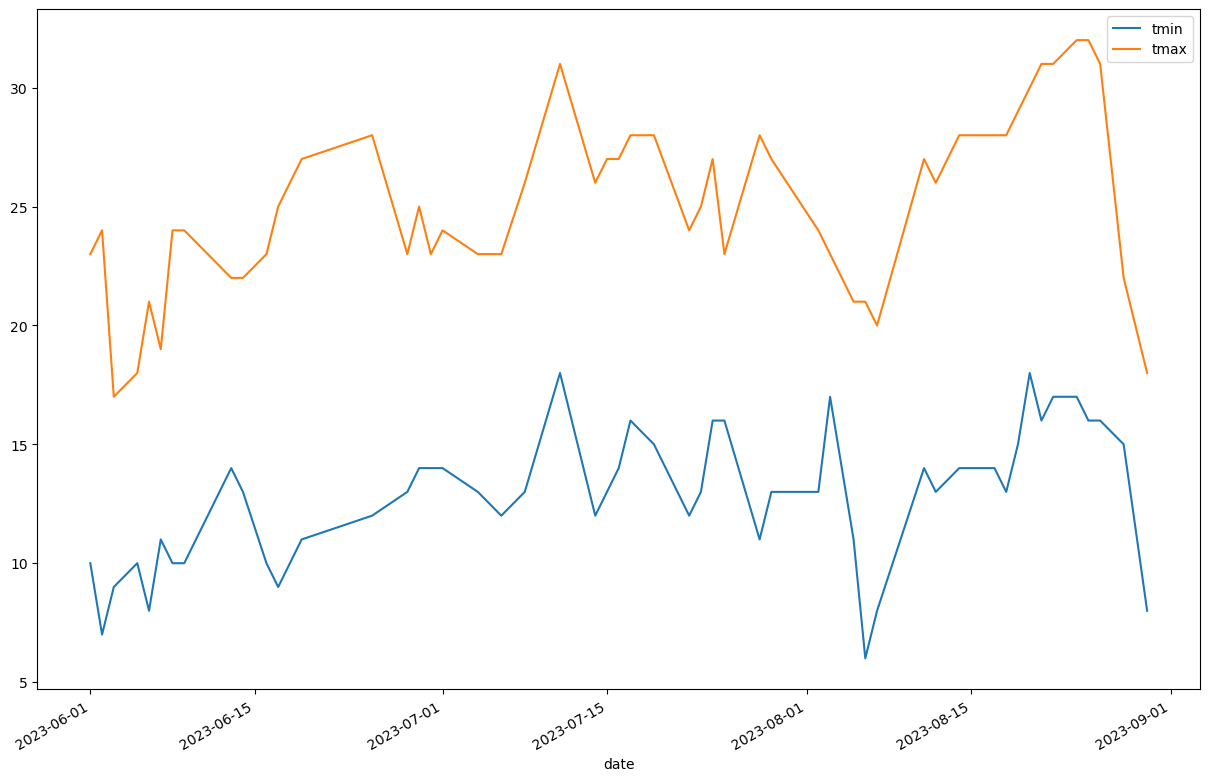

In [13]:
meteo_timeframe_df.plot(x="date", figsize=(15, 10))

# Correlation between Meteo and Movimento turistico

In [14]:
print(f"The range of dates for movimento turistico: {len(movimento_turistico_timeframe['date'])}")
print(f"The range of dates for meteo: {len(meteo_timeframe_df['date'])}")

The range of dates for movimento turistico: 122
The range of dates for meteo: 52


In [15]:
# Consider the smallest range of dates - meteo_timeframe 
date_timeframe = meteo_timeframe_df["date"]
presenze = movimento_turistico_timeframe[movimento_turistico_timeframe["date"].isin(date_timeframe)]["presenze"]

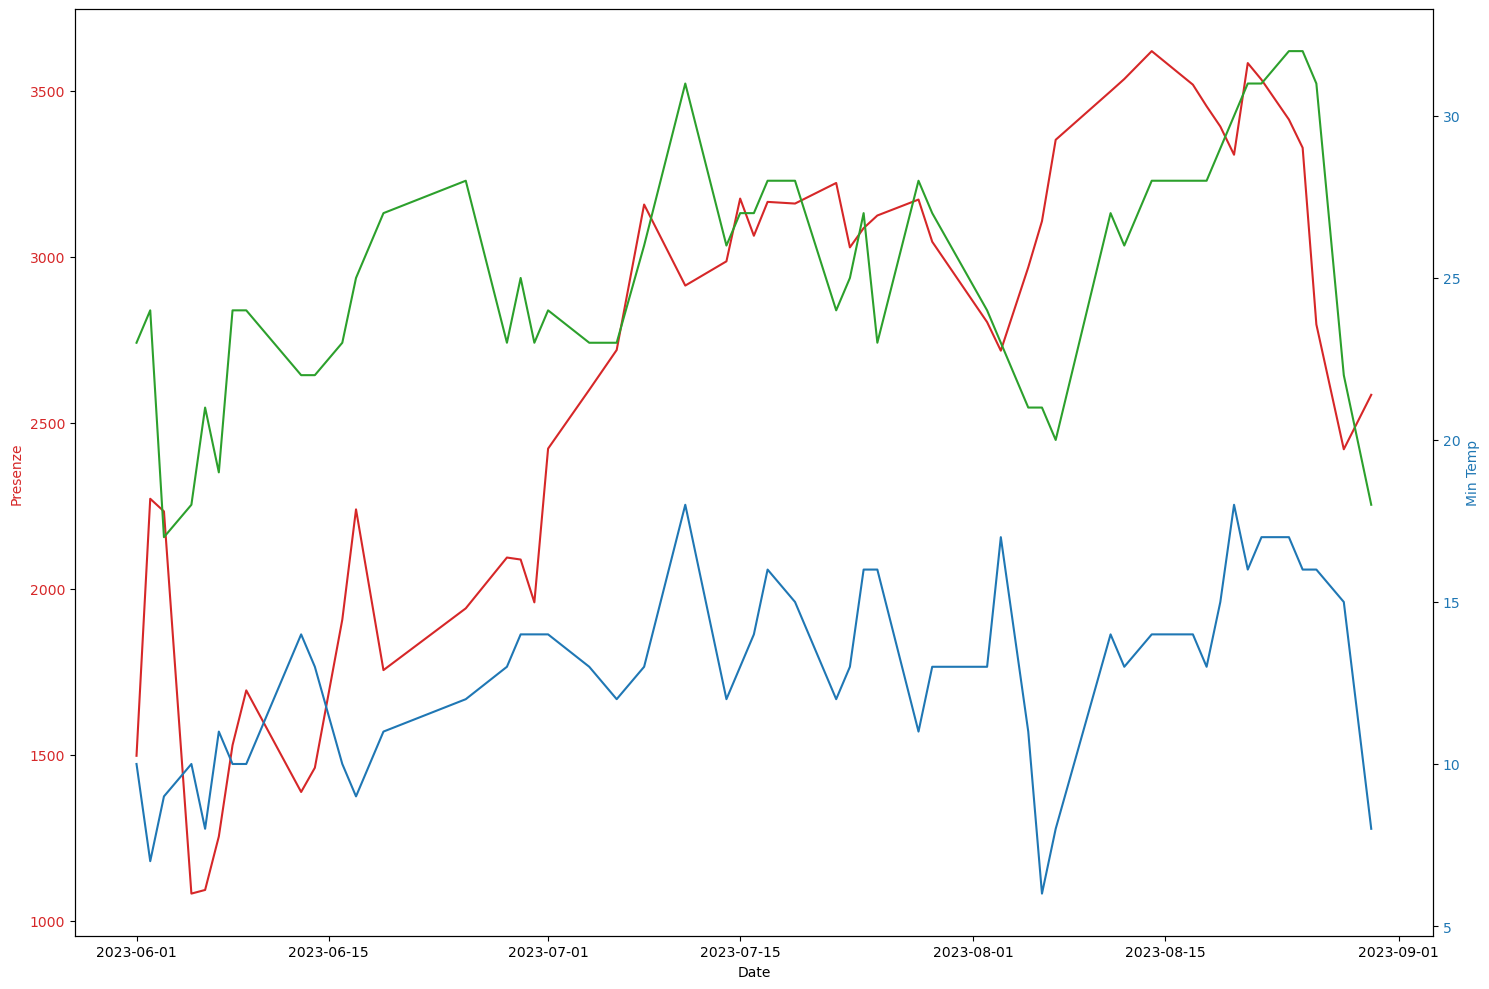

In [17]:
import matplotlib.pyplot as plt
import numpy as np

time_frame = date_timeframe
data_presenze = presenze
data_tmin = meteo_timeframe_df["tmin"]
data_tmax = meteo_timeframe_df["tmax"]

fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Presenze', color=color)
presenze_line = ax1.plot(time_frame, data_presenze, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Max Temp', color=color)  
max_temp_line = ax2.plot(time_frame, data_tmax, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('Min Temp', color=color) 
min_temp_line = ax2.plot(time_frame, data_tmin, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Questions
    
